In [1]:
print("Hello World!")

Hello World!


In [2]:
%matplotlib inline

In [3]:
import numpy as np #manipulation de matrices, tableaux et fonctions mathématiques
import pandas as pd #manipulation et analyse de données
from pandas import Series, DataFrame
import matplotlib.pyplot as plt #tracer et visualiser des données sous forme de graphique

In [4]:
data=np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

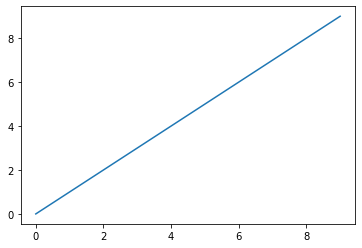

In [5]:
plt.plot(data)

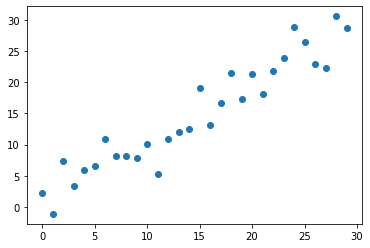

In [6]:
plt.scatter(np.arange(30),np.arange(30) + 3 * np.random.randn(30)) #pyplot.scatter(x, y, c = 'red')

(array([3., 4., 2., 3., 1., 7., 5., 1., 3., 1.]),
 array([-1.41790819e+00, -1.06346242e+00, -7.09016653e-01, -3.54570886e-01,
        -1.25119040e-04,  3.54320648e-01,  7.08766415e-01,  1.06321218e+00,
         1.41765795e+00,  1.77210372e+00,  2.12654948e+00]),
 <BarContainer object of 10 artists>)

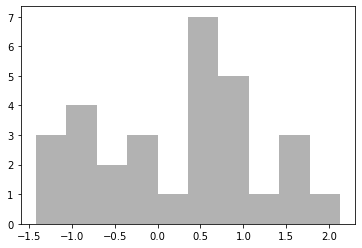

In [7]:
plt.hist(np.random.randn(30), bins=10, color='k', alpha=0.3)
#x = [1, 2, 2, 3, 4, 4, 4, 4, 4, 5, 5]
#pyplot.hist(x, range = (0, 5), bins = 5, color = 'yellow', edgecolor = 'red')
#pyplot.xlabel('valeurs')
#pyplot.ylabel('nombres')
#pyplot.title('Exemple d\' histogramme simple')

In [9]:
prenoms= pd.read_csv("Datasets\dpt2018.csv",sep=";")

In [10]:
prenoms

,sexe,preusuel,annais,dpt,nombre
0,1,A,XXXX,XX,27
1,1,AADAM,XXXX,XX,27
2,1,AADEL,XXXX,XX,55
3,1,AADIL,1983,84,3
4,1,AADIL,1992,92,3
...,...,...,...,...,...
3624989,2,ÉYA,2014,69,3
3624990,2,ÉYA,XXXX,XX,23
3624991,2,ÏNAYA,XXXX,XX,21
3624992,2,ÖZGE,XXXX,XX,30


In [11]:
prenoms.head()

,sexe,preusuel,annais,dpt,nombre
0,1,A,XXXX,XX,27
1,1,AADAM,XXXX,XX,27
2,1,AADEL,XXXX,XX,55
3,1,AADIL,1983,84,3
4,1,AADIL,1992,92,3


In [12]:
nb_lignes, nb_col = prenoms.shape
print(f"nb lignes : {nb_lignes}\nnb col : {nb_col}")

nb lignes : 3624994
nb col : 5


In [13]:
prenoms.describe()

,sexe,nombre
count,3.624994e+06,3.624994e+06
mean,1.536878e+00,2.348677e+01
std,4.986382e-01,8.047885e+01
min,1.000000e+00,3.000000e+00
25%,1.000000e+00,4.000000e+00
50%,2.000000e+00,7.000000e+00
75%,2.000000e+00,1.900000e+01
max,2.000000e+00,6.328000e+03


In [14]:
# Choix d'une colonne
prenoms["sexe"]

0          1
1          1
2          1
3          1
4          1
          ..
3624989    2
3624990    2
3624991    2
3624992    2
3624993    2
Name: sexe, Length: 3624994, dtype: int64

In [15]:
prenoms.dtypes

sexe         int64
preusuel    object
annais      object
dpt         object
nombre       int64
dtype: object

In [16]:
prenoms.columns

Index(['sexe', 'preusuel', 'annais', 'dpt', 'nombre'], dtype='object')

In [17]:
# GROUP BY
prenoms.groupby("sexe").nombre.sum()

sexe
1    42888936
2    42250453
Name: nombre, dtype: int64

In [18]:
# SORT
prenoms.sort_values(by='nombre')[-20:]

,sexe,preusuel,annais,dpt,nombre
597526,1,GERMAIN,XXXX,XX,4791
2838272,2,LYDIE,XXXX,XX,4870
691808,1,HUGUES,XXXX,XX,4878
2384919,2,FRANCE,XXXX,XX,4916
3316430,2,RACHEL,XXXX,XX,5040
552097,1,FÉLIX,XXXX,XX,5080
669783,1,HENRY,XXXX,XX,5096
1076909,1,MARTIAL,XXXX,XX,5131
2820207,2,LUCILE,XXXX,XX,5145
9823,1,ABEL,XXXX,XX,5157


In [20]:
# Top des départements avec le plus et le moins de naissances
prenoms.groupby("dpt").nombre.sum().sort_values()

dpt
48      104399
04      105739
05      126071
09      156535
973     169185
        ...   
69     2073802
62     2350845
59     4175920
75     6160048
XX     8261688
Name: nombre, Length: 100, dtype: int64

In [21]:
# All time - All departements top 20
prenoms.groupby(prenoms.preusuel).nombre.sum().sort_values()[-20:]

preusuel
DOMINIQUE          409919
PAUL               416412
ROBERT             419297
ROGER              423873
DANIEL             435021
MARCEL             467850
CLAUDE             468445
BERNARD            469399
JACQUES            482812
ALAIN              506899
RENÉ               516739
LOUIS              517774
PHILIPPE           538661
JEANNE             556074
ANDRÉ              712568
MICHEL             820459
PIERRE             891894
_PRENOMS_RARES    1575032
JEAN              1917129
MARIE             2260236
Name: nombre, dtype: int64

In [22]:
# All time - All departements 20 prénoms les moins donnés (*)
prenoms.groupby(prenoms.preusuel).nombre.sum().sort_values()[:20]

preusuel
SCHÉRAZADE     20
SHYM           20
SHYMA          20
GIANMARCO      20
MPALY          20
BETHEL         20
ROMILDE        20
GIBRYL         20
LIRA           20
IMRANA         20
LIOVA          20
SHYNNA         20
MARC-ALBERT    20
NOLWAN         20
ALIHA          20
ALIFA          20
LIOBA          20
GILAINE        20
KACIA          20
MARC'ANTO      20
Name: nombre, dtype: int64

In [23]:
#Filtrer les lignes :
prenoms[(prenoms.preusuel=="GERMAIN")].sort_values(by='nombre')[:10]

,sexe,preusuel,annais,dpt,nombre
594987,1,GERMAIN,1918,86,3
594362,1,GERMAIN,1909,79,3
597231,1,GERMAIN,1989,77,3
596699,1,GERMAIN,1951,27,3
595506,1,GERMAIN,1926,08,3
597225,1,GERMAIN,1989,56,3
597224,1,GERMAIN,1989,52,3
596702,1,GERMAIN,1951,35,3
596705,1,GERMAIN,1951,53,3
595494,1,GERMAIN,1925,86,3


In [24]:
prenoms=prenoms[(prenoms.dpt != "XX")]
prenoms.count()

sexe        3589386
preusuel    3589386
annais      3589386
dpt         3589386
nombre      3589386
dtype: int64

In [25]:
# 10 prenoms les plus frequents de 2018
prenoms[(prenoms.annais=="2018")].groupby(prenoms.preusuel).nombre.sum().sort_values()[-10:]

preusuel
LOUISE             3765
ADAM               3885
JADE               3977
LUCAS              3978
EMMA               4367
LOUIS              4411
LÉO                4444
RAPHAËL            4589
GABRIEL            5418
_PRENOMS_RARES    53978
Name: nombre, dtype: int64

c:\users\leays\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='annais'>

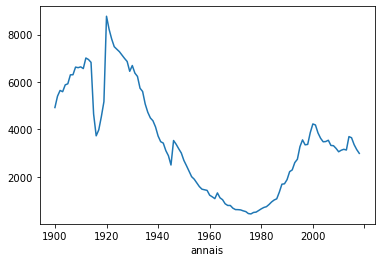

In [26]:
prenoms[(prenoms.preusuel=="PAUL")].groupby("annais").nombre.sum().plot()

c:\users\leays\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='annais'>

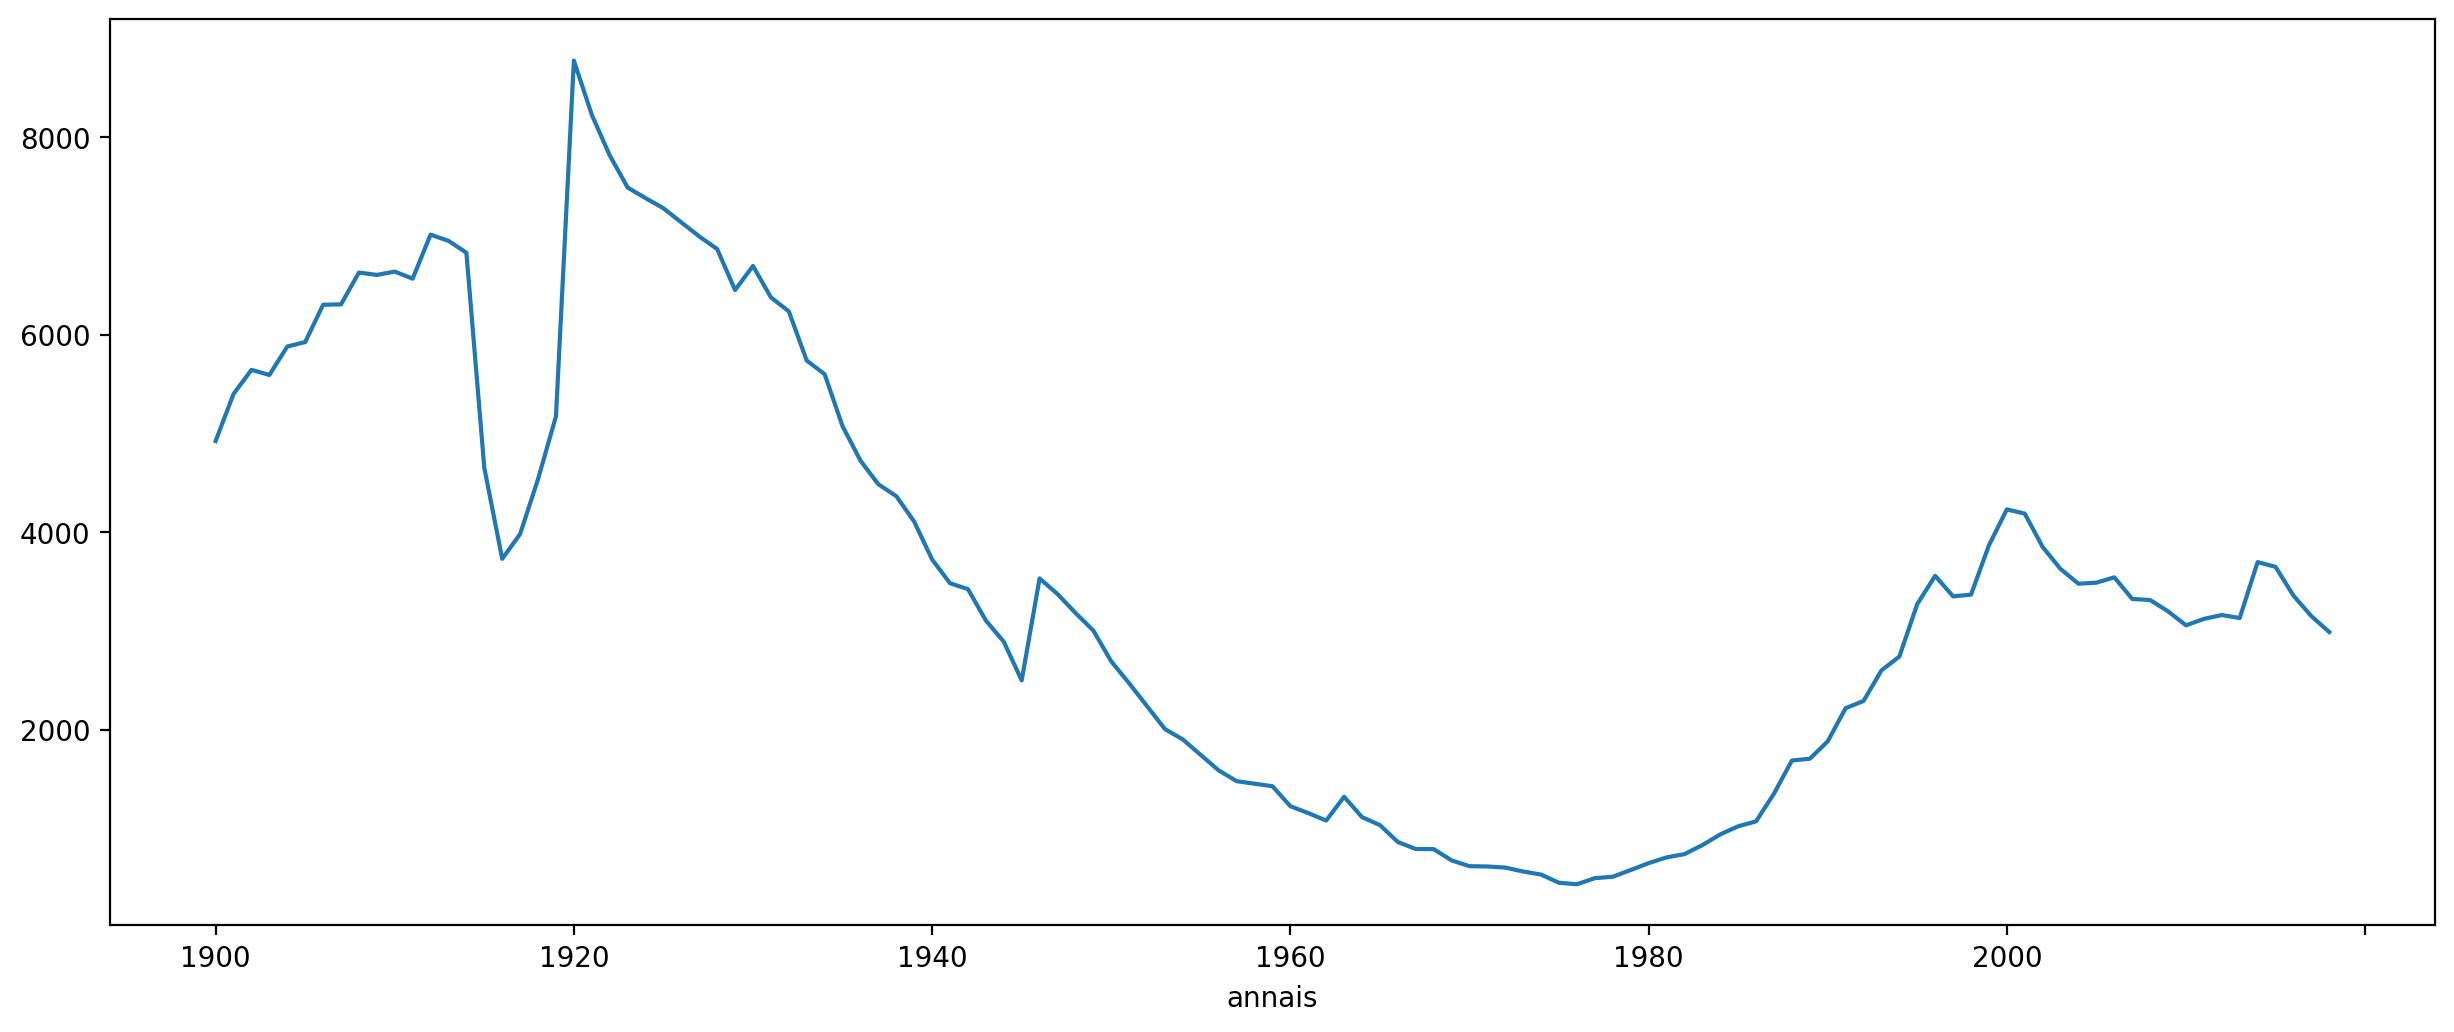

In [27]:
plt.rcParams['figure.figsize'] = [15, 6] # Taille du graphique en pouces
plt.rcParams['figure.dpi'] = 200 # résolution en points par pouce
prenoms[(prenoms.preusuel=="PAUL")].groupby("annais").nombre.sum().plot()